In [144]:
import pandas as pd 
import numpy as np
df = pd.read_json(r'C:\Users\luoyu\Desktop\ise540\project\coronavirus_vaccine.json', orient = 'records',lines=True)

In [145]:
df=pd.read_pickle(r"C:\Users\luoyu\Desktop\ise540\project\lstm_pred.pkl")
df['user_id'] = df.index

In [146]:
df_new = df[['user_id', 'user_loc','prediction']]
df_new = df_new[df['user_loc'].notna()]

In [147]:
locations = pd.read_csv(r'C:\Users\luoyu\Desktop\ise540\project\us_cities_states_counties.csv',sep='|')
locations = locations[['City','State short','State full']].drop_duplicates()

In [148]:
states = locations[['State short','State full']].drop_duplicates().dropna()
states_dict = states.set_index('State full').to_dict()

### Geotext and states_dict

In [149]:
def filter_x(x):
    if len(x)==1: return x[0]
    else: return None
    
from geotext import GeoText
df_new['cities'] = df_new['user_loc'].apply(lambda x: GeoText(x).cities)
df_new['country'] = df_new['user_loc'].apply(lambda x: list(GeoText(x).country_mentions.keys()))
df_new['country'] = df_new['country'].apply(filter_x)
df_new = df_new[df_new['country']=='US' ]
df_new['cities'] = df_new['cities'].apply(filter_x)
df_new = df_new[df_new['cities'].notna()]

In [150]:
def get_state(x):
    state = [state for state in list(states['State short']) if state in x]
    if state:
        return state[0]
    else: 
        state = [state for state in list(states['State full']) if state in x]
        if state:
            return states_dict['State short'].get(state[0])
        else: return None
df_new['state'] = df_new['user_loc'].apply(get_state)
df_geo = df_new[df_new['state'].notna()].drop(['country'],axis=1)
df_geo_cities = df_new[df_new['state'].isna()].drop(['state'],axis=1)

In [151]:
df_geo_cities = df_geo_cities.join(locations.set_index('City'), on='cities')

### Only states_dict

In [152]:
def get_state_dict(x):
    state = [state for state in list(states['State full']) if state in x]
    if state:
        return states_dict['State short'].get(state[0])
    else: return None
df_states = df[['user_id', 'user_loc']]
df_states = df_states[df_states['user_loc'].notna()]
df_states['state'] = df_states['user_loc'].apply(get_state_dict)
df_states = df_states.dropna()


In [154]:
final_df = pd.concat([df_geo.set_index('user_id'), df_states.set_index('user_id')])
final_df = final_df[~final_df.index.duplicated(keep='first')]
#df_geo.set_index('user_id').union(df_states.set_index('user_id'))

In [177]:
test_df = final_df.groupby(['state']).agg({'prediction': ['sum','count']})
test_df.columns = test_df.columns.get_level_values(1)
test_df['sum'] = -test_df['sum']
test_df['negative percentage'] = test_df['sum']/test_df['count']
test_df['state_ab'] = test_df.index
test_df = test_df.join(states.set_index('State short'),on='state')

### Political preference

In [179]:
politics = pd.read_excel(r'C:\Users\luoyu\Desktop\ise540\project\politics.xlsx')

In [180]:
full_compare = politics.join(test_df.set_index('State full'),on='State').dropna()

In [160]:
from chart_studio.plotly import plot, iplot
import plotly.graph_objs as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [195]:
full_compare

,State,Republican/lean Rep.,Democrat/lean Dem.,sum,count,negative percentage,state_ab
0,Alabama,0.58,0.39,64.0,270.0,0.237037,AL
1,Alaska,0.49,0.44,24.0,57.0,0.421053,AK
2,Arizona,0.46,0.48,230.0,864.0,0.266204,AZ
3,Arkansas,0.60,0.35,30.0,120.0,0.250000,AR
4,California,0.32,0.62,1169.0,5034.0,0.232221,CA
5,Colorado,0.41,0.52,123.0,471.0,0.261146,CO
6,Connecticut,0.38,0.60,43.0,237.0,0.181435,CT
7,Delaware,0.36,0.58,36.0,119.0,0.302521,DE
9,Florida,0.46,0.49,448.0,1605.0,0.279128,FL
10,Georgia,0.47,0.48,217.0,797.0,0.272271,GA


In [191]:
data = dict(type='choropleth',
            locations = full_compare['state_ab'],
            locationmode = 'USA-states',
            colorscale = 'Reds',
            z = full_compare['negative percentage'],
            colorbar = {'title':"Negative Percentage"}
            )
layout = dict(title = 'Negative Percentage by States',
              geo = dict(scope='usa')
             )

In [192]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [185]:
data = dict(type='choropleth',
            locations = full_compare['state_ab'],
            locationmode = 'USA-states',
            colorscale = 'Reds',
            z = full_compare['Republican/lean Rep.'],
            colorbar = {'title':"Republican/lean Rep."}
            )
layout = dict(title = 'Trump Poll by State',
              geo = dict(scope='usa')
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

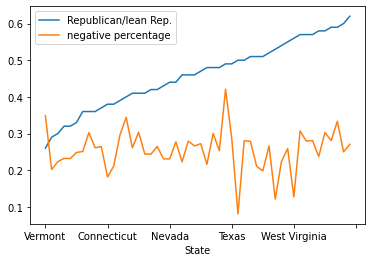

In [194]:
drawline = full_compare[['State','Republican/lean Rep.','negative percentage']].set_index('State').sort_values(by=['Republican/lean Rep.'])
lines = drawline.plot.line()